In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# PCA(Principle Component Analysis)
PCA是一种数据降为的算法，通常是为了可视化数据，由于人眼只能看到三维的数据，透过PCA能把三维以上的数据可视化。此外，透过PCA也能使得数据更好使用、降低所需计算资源、移除噪声。

PCA的目的是在尽可能少的丢失信息的情况下进行降维，最终目的是希望降到特征间彼此独立。以可视化的角度来说，其基于投影进行降维，我们希望投影后数据能尽可能的分开，故需要选择特征方差大的向量(一个基)进行投影，保留方差小的向量，方差为0代表特征彼此独立。 
我们设原始数据矩阵$X$对应的协方差矩阵为$C$，而$P$是一组基按行组成的矩阵，设$Y=PX$，则$Y$为$X$对$P$做基变换后的数据。设$Y$的协方差矩阵为$D$，我们推导一下$D$与$C$的关系： 
$$
D=YY^T=(PX)(PX)^T=PXX^TP^T=P(XX^T)P^T=PCP^T
$$
我们希望D是个对角矩阵，即只有中间有值，其他特征之间都是独立关系。  
首先计算出数据协方差矩阵的特征值以及特征向量,计算协方差的公式如下
$$
Conv(X,Y)=E((X-u)(Y-v)),E(X)=u,E(Y)=v
$$

求出特征值与特征向量后，按照特征值由大到小对特征向量进行排序，取前面k组特征向量组成矩阵P。Y=PX即为PCA降维后的数据。

### 优缺点

优点：降低数据的复杂度、找出重要的特征  
缺点：可能会丢失重要的信息


接下来我们用代码介绍PCA

In [19]:
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return np.mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = np.cov(meanRemoved, rowvar=0) # shape of covMat is 2,2 since rowvar take each column as a variable
    print(covMat)
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)            #sort, sort goes smallest to largest
    print(eigVals[eigValInd])
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    print(eigVals[eigValInd])
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

dataMat=loadDataSet('./datasets/testSet.txt')
lowDMat, reconMat=pca(dataMat,1)
np.shape(lowDMat),np.shape(reconMat)

[[1.05198368 1.1246314 ]
 [1.1246314  2.21166499]]
[0.36651371 2.89713496]
[2.89713496]


((1000, 1), (1000, 2))

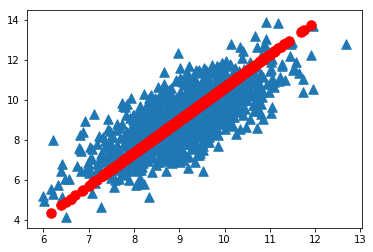

In [8]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0],marker='^',s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0],marker='o',s=90,c='red')

接下来，我们利用PCA来为半导体制程数据进行降维，半导体数据每一笔有590个特征

In [22]:
def replaceNanWithMean(): 
    datMat = loadDataSet('./datasets/secom.data', ' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[np.nonzero(np.isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat
dataMat=replaceNanWithMean()
meanVals=np.mean(dataMat,axis=0)
meanRemoved=dataMat-meanVals
covMat=np.cov(meanRemoved,rowvar=0)
eigVals,eigVects = np.linalg.eig(np.mat(covMat))
eigVals

array([ 5.34151979e+07+0.00000000e+00j,  2.17466719e+07+0.00000000e+00j,
        8.24837662e+06+0.00000000e+00j,  2.07388086e+06+0.00000000e+00j,
        1.31540439e+06+0.00000000e+00j,  4.67693557e+05+0.00000000e+00j,
        2.90863555e+05+0.00000000e+00j,  2.83668601e+05+0.00000000e+00j,
        2.37155830e+05+0.00000000e+00j,  2.08513836e+05+0.00000000e+00j,
        1.96098849e+05+0.00000000e+00j,  1.86856549e+05+0.00000000e+00j,
        1.52422354e+05+0.00000000e+00j,  1.13215032e+05+0.00000000e+00j,
        1.08493848e+05+0.00000000e+00j,  1.02849533e+05+0.00000000e+00j,
        1.00166164e+05+0.00000000e+00j,  8.33473762e+04+0.00000000e+00j,
        8.15850591e+04+0.00000000e+00j,  7.76560524e+04+0.00000000e+00j,
        6.66060410e+04+0.00000000e+00j,  6.52620058e+04+0.00000000e+00j,
        5.96776503e+04+0.00000000e+00j,  5.16269933e+04+0.00000000e+00j,
        5.03324580e+04+0.00000000e+00j,  4.54661746e+04+0.00000000e+00j,
        4.41914029e+04+0.00000000e+00j,  4.15532551

可以看到有很多特征值为0，代表这些特征没有提供什么信息

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


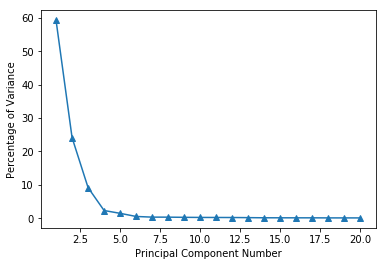

In [24]:
eigValInd = np.argsort(eigVals)            #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1] # reverse
sortedEigVals = eigVals[eigValInd]
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [36]:
eigInd=eigValInd[:2]
# print(eigValInd)
redEigVects = eigVects[:,eigInd]       #reorganize eig vects largest to smallest
lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
reconMat = (lowDDataMat * redEigVects.T) + meanVals

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


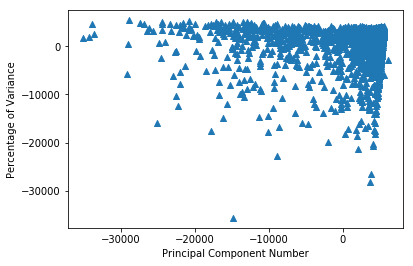

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lowDDataMat[:,0].flatten().A[0], lowDDataMat[:,1].flatten().A[0], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [42]:
meanVals = np.mean(lowDDataMat, axis=0)
meanRemoved = lowDDataMat - meanVals #remove mean
covMat = np.cov(meanRemoved, rowvar=0)
covMat

array([[5.34151979e+07+0.j, 6.16599774e-09+0.j],
       [6.16599774e-09+0.j, 2.17466719e+07+0.j]])